In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import sys
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score

2025-03-11 13:28:36.862234: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 13:28:36.870473: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 13:28:36.938367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741721317.017397 1005667 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741721317.030530 1005667 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def unet_classification(input_shape=(100, 100, 1), num_classes=12):
    inputs = layers.Input(input_shape)

    # Codificador (Contracción)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    # Cuello de botella
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)

    # Decodificador (Expansión) - NO USADO EN ESTE EJEMPLO, solo el codificador es aprovechado.
    # Aplanamiento y capas de clasificación
    flat = layers.Flatten()(conv4)
    dense1 = layers.Dense(500, activation='relu')(flat)
    dense2 = layers.Dense(200, activation='relu')(dense1)
    dense3 = layers.Dense(100, activation='relu')(dense2)
    outputs = layers.Dense(num_classes, activation='softmax')(dense3)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


In [3]:
# Crear el modelo
model = unet_classification()


2025-03-11 13:28:50.356044: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Imprimir un resumen del modelo
#model.summary()

In [5]:
#Cargar datos de entrenamiento
training_set = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_entrenamiento_TCGA_matriz.npy" ### "Input data npy file" 
x_sample = np.load ( training_set )
x_train = x_sample.reshape ((x_sample.shape[0], 100, 100,1)) # No. de muestras, Longitud, Ancho, No. de filtros
# Cargar etiquetas de los datos de entrenamiento
training_label = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_entrenamiento_TCGA_etiquetas.npy" ### "Input label npy file" 
y_label = np.load ( training_label )
y_train = to_categorical(y_label, num_classes=12)

In [6]:
# Carga de datos de validacion
testing_set = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_validacion_TCGA_matriz.npy"
test_sample = np.load ( testing_set )
x_test = test_sample.reshape ( (test_sample.shape[0], 100, 100, 1) ) # no. of samples, x pixels, y pixels, no. of files

# Carga de etiquetas de datos de validacion
testing_label = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_validacion_TCGA_etiquetas.npy"
test_label = np.load ( testing_label )
test_label_compare = test_label
y_test = to_categorical (test_label,num_classes=12 )

In [7]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=53, validation_split=0.25) #Quitar comentario para entrenar.

Epoch 1/53
29/29 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.2328 - loss: 3.5895 - val_accuracy: 0.2117 - val_loss: 2.4022
Epoch 2/53
29/29 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.2601 - loss: 2.3280 - val_accuracy: 0.2117 - val_loss: 2.3836
Epoch 3/53
29/29 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.2738 - loss: 2.3032 - val_accuracy: 0.2117 - val_loss: 2.3813
Epoch 4/53
29/29 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.2688 - loss: 2.2917 - val_accuracy: 0.2117 - val_loss: 2.3902
Epoch 5/53
29/29 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.2481 - loss: 2.3123 - val_accuracy: 0.2117 - val_loss: 2.3920
Epoch 6/53
29/29 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.2601 - loss: 2.3066 - val_accuracy: 0.2117 - val_loss: 2.3938
Epoch 7/53
29/29 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.2597 - loss: 2.3279 - val_accuracy: 0.2117 - val_loss: 2.3875
Epoch 8/53
29/29 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.2757 - loss: 2.2873 - val_accuracy: 0.2117 - val_los

In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 100, 100, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │    36,864,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │         1,212 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,010,710 (476.88 MB)

 Trainable params: 41,670,236 (158.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 83,340,474 (317.92 MB)

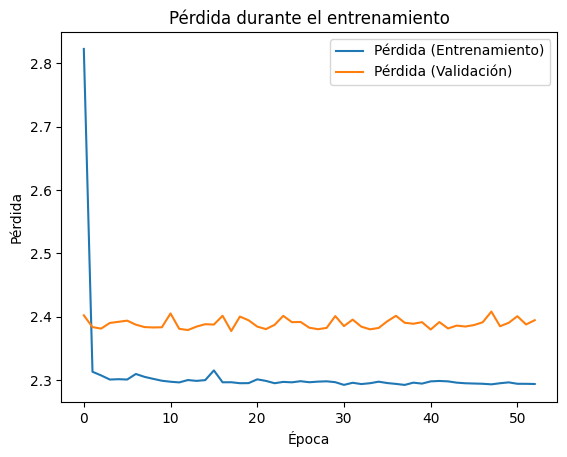

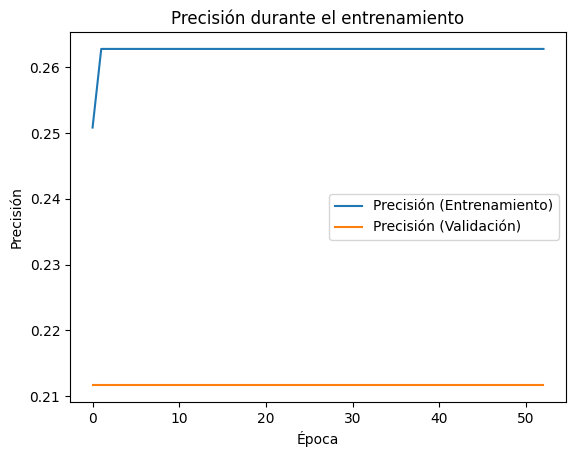

In [8]:
plt.plot(history.history['loss'], label='Pérdida (Entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (Validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

# Gráfico de la precisión

plt.plot(history.history['accuracy'], label='Precisión (Entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (Validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.show()

In [9]:
loss, accuracy = model.evaluate(x_test,y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)



#Calcular el MCC              MCC = (TP * TN - FP * FN) / sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
y_pred = model.predict(x_test) # o x_test
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
num_classes = cm.shape[0]
mcc_per_class = []
for i in range(num_classes):
    tp = cm[i, i]
    fp = np.sum(cm[:, i]) - tp
    fn = np.sum(cm[i, :]) - tp
    tn = np.sum(cm) - (tp + fp + fn)
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    if denominator == 0:
        mcc_per_class.append(0)
    else:
        mcc_per_class.append(numerator / denominator)
mcc = np.mean(mcc_per_class)
print("MCC:", mcc)

# Calculo de precision
# Calcular precisión micro
precision_micro = precision_score(y_true_classes, y_pred_classes, average='micro')
print("Precisión micro (Prueba):", precision_micro)

# Calcular precisión macro
precision_macro = precision_score(y_true_classes, y_pred_classes, average='macro')
print("Precisión macro (Prueba):", precision_macro)

# Calcular precisión ponderada
precision_weighted = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precisión ponderada (Prueba):", precision_weighted)

# Calcular precisión por clase
precision_per_class = precision_score(y_true_classes, y_pred_classes, average=None)
print("Precisión por clase (Prueba):", precision_per_class)

154/154 ━━━━━━━━━━━━━━━━━━━━ 39s 255ms/step - accuracy: 0.0621 - loss: 2.5822
Loss: 2.5726425647735596
Accuracy: 0.06132844462990761
154/154 ━━━━━━━━━━━━━━━━━━━━ 39s 249ms/step
MCC: 0.0
Precisión micro (Prueba): 0.06132844335778321
Precisión macro (Prueba): 0.005110703613148601
Precisión ponderada (Prueba): 0.0037611779646888233
Precisión por clase (Prueba): [0.06132844 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


/home/arthur1/Documentos/GitHub/Prueba/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arthur1/Documentos/GitHub/Prueba/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arthur1/Documentos/GitHub/Prueba/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [10]:
# Obtener las predicciones
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

154/154 ━━━━━━━━━━━━━━━━━━━━ 38s 248ms/step


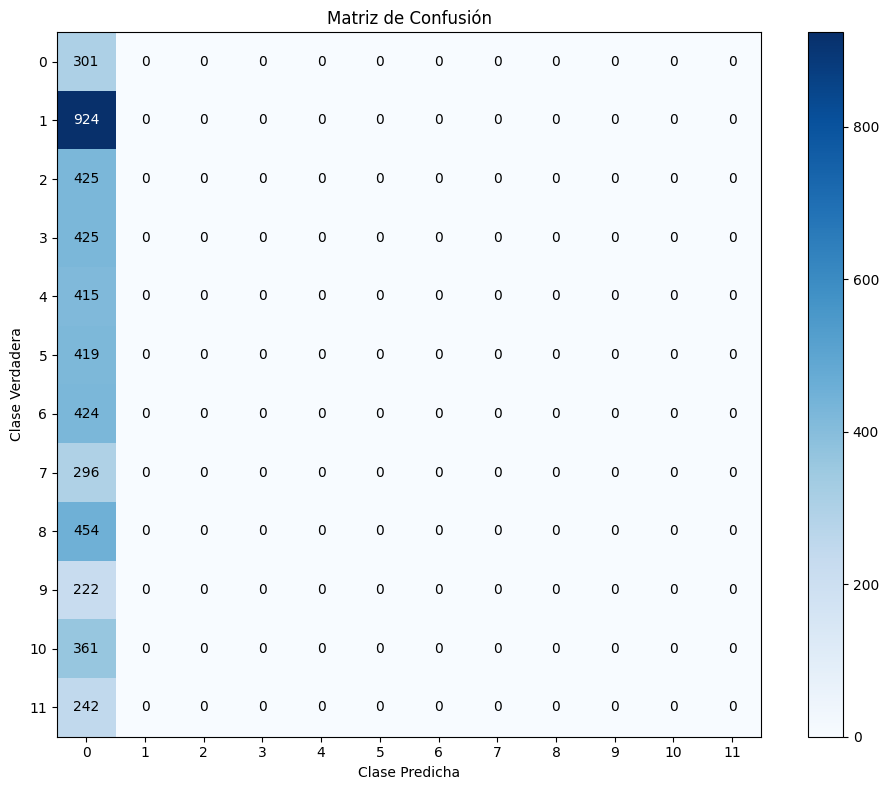

In [11]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(12)
plt.xticks(tick_marks, range(12))
plt.yticks(tick_marks, range(12))
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()